In [192]:
import pandas as pd
import numpy as np

In [193]:
SCENARIO_NUMBER = 1
options = {
    0:(5.0,'put'),
    1:(5.5,'put'),
    2:(6.0,'put'),
    3:(6.5,'put'),
    4:(7.0,'put'),
    5:(7.5,'put'),
    6:(8.0,'put'),
    7:(5.0,'call'),
    8:(5.5,'call'),
    9:(6.0,'call'),
    10:(6.5,'call'),
    11:(7.0,'call'),
    12:(7.5,'call'),
    13:(8.0,'call'),
}
scenario = pd.read_csv('104/Scenario'+ str(SCENARIO_NUMBER) +'.csv')
prices = pd.read_csv('104/option_prices_scenario_'+ str(SCENARIO_NUMBER) + '.csv')
prices_list = prices['Price [USD]'].to_list()
scenario_list = scenario.to_dict(orient='list')

In [194]:
scenario['total'] = scenario['yield [thousands of bushels]'] * scenario['price [$/bushel]'] * 1000

<Axes: ylabel='Frequency'>

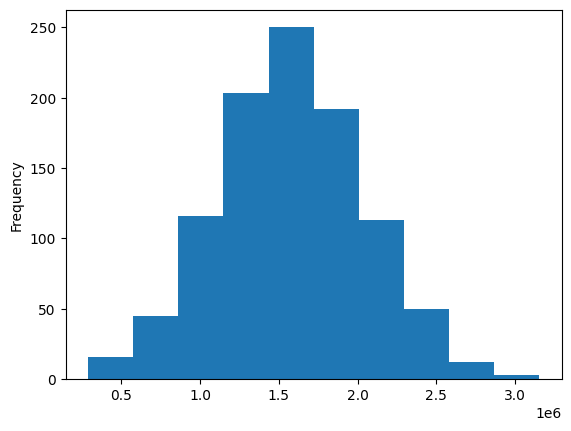

In [195]:
scenario['total'].plot.hist()

In [196]:
def calculate_profit(strike, market_price, typ):
    if typ == 'call':
        return max(100 * (market_price - strike), 0.0)
    return max(100 * (strike - market_price), 0.0)


In [197]:
def profit(option_prices, yi, market_price, strategy):
    res = yi * market_price * 1000
    before_options = res
    for i in range(14):
        strike, typ = options[i]
        res += strategy[i] * calculate_profit(strike, market_price, typ)
        res -= option_prices[i] * strategy[i]
    return res

In [198]:
def get_incomes_of_strategy(strategy, market_prices, yields, option_prices, return_quantiles=False):
    profits = []
    for i in range(1000):
        curr_profit = profit(option_prices, yields[i], market_prices[i], strategy)
        profits.append(curr_profit)
    return profits

In [199]:
strat = [256.0, 136.0, 332.0, 622.0, 1221.0, 180.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   # 1
# strat = [328.0, 300.0, 448.0, 508.0, 232.0, 736.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # 2
# strat = [145.0, 387.0, 537.0, 1090.0, 267.0, 256.0, 237.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # 3

In [200]:
total_options = get_incomes_of_strategy(strat, scenario_list['price [$/bushel]'], scenario_list['yield [thousands of bushels]'], prices_list,)

In [201]:
scenario['expected_income_options'] = total_options

<Axes: ylabel='Frequency'>

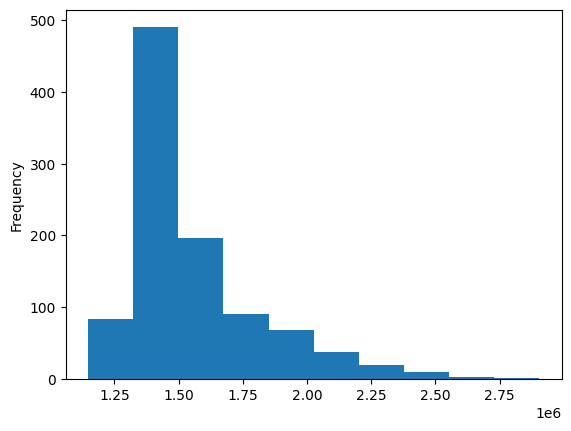

In [204]:
scenario['expected_income_options'].plot.hist()

In [206]:
scenario.mean()

yield [thousands of bushels]    2.446634e+02
price [$/bushel]                6.472742e+00
total                           1.583351e+06
expected_income_options         1.560676e+06
dtype: float64

In [207]:
scenario.std()

yield [thousands of bushels]        14.388529
price [$/bushel]                     1.864792
total                           465237.913693
expected_income_options         255084.227150
dtype: float64

In [208]:
scenario.describe()

,yield [thousands of bushels],price [$/bushel],total,expected_income_options
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,244.663360,6.472742,1.583351e+06,1.560676e+06
std,14.388529,1.864792,4.652379e+05,2.550842e+05
min,197.120000,1.093000,2.894155e+05,1.148338e+06
25%,234.662500,5.255500,1.277796e+06,1.400008e+06
50%,246.405000,6.453500,1.587918e+06,1.473075e+06
75%,254.947500,7.728000,1.890055e+06,1.642282e+06
max,278.860000,12.198000,3.152694e+06,2.903276e+06


In [189]:
scenario.to_csv('expected_income' + str(SCENARIO_NUMBER) + '.csv' )

In [190]:
from matplotlib import pyplot

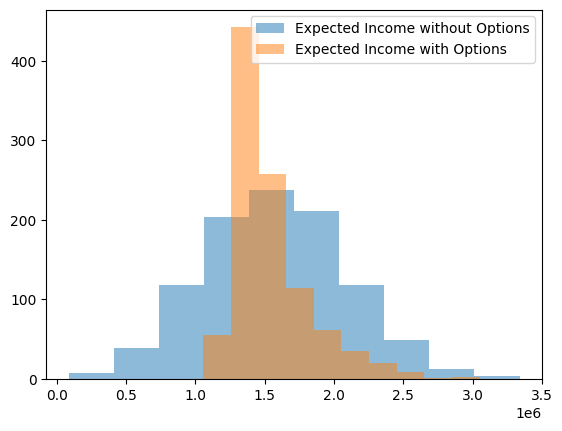

In [191]:
pyplot.hist(scenario['total'], alpha=0.5, label='Expected Income without Options')
pyplot.hist(scenario['expected_income_options'], alpha=0.5, label='Expected Income with Options')
pyplot.legend(loc='upper right')
pyplot.show()